# Chapter 31: Clefs, Ties, and Beams

Throughout the first thirty chapters, we have repeatedly been using fundamental music notation principles, such as clefs, ties, and beams.

Now we talk about them directly.

In [1]:
from music21 import *

Let’s first look at **clefs**.

In [3]:
alto = clef.AltoClef()
m = stream.Measure([alto])
m.show('xml')

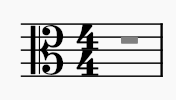

In [4]:
# they generally have a Duration of zero
alto.offset

0.0

In [5]:
alto.duration

<music21.duration.Duration 0.0>

Most of the clefs in common use are *PitchClefs* and they know what line they are on

In [6]:
alto.line

3

In [7]:
tenor = clef.TenorClef()
tenor.show('xml')

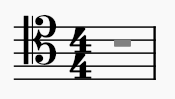

In [8]:
tenor.line

4

In this case, the line refers to the pitch that it’s “sign” can be found on.

In [9]:
tenor.sign

'C'

In [10]:
treble = clef.TrebleClef()
treble.sign

'G'

you can also create your own clef

In [11]:
pc = clef.PitchClef()
pc.sign = 'F'
pc.line = 4
pc.octaveChange = -1
pc.show('xml')

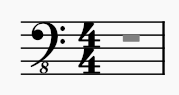

And you can get a clef from a string by using the ***clefFromString()*** function

In [12]:
clef.clefFromString('treble')

<music21.clef.TrebleClef>

In [13]:
# Or from a sign and a number of the line
c = clef.clefFromString('C4')
c.show('xml')

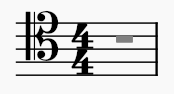

## Automatic Clef Generation

Look at this quick Stream

In [17]:
n = note.Note('B2')
s = stream.Stream([n])
s.show('xml')

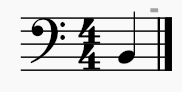

How did *music21* know to make the clef be bass clef? 

there’s a function called ***bestClef()*** which can return the best clef given the contents of the stream:

In [18]:
clef.bestClef(s)

<music21.clef.BassClef>

In [19]:
s.append(note.Note('C6'))
clef.bestClef(s)

<music21.clef.TrebleClef>

In [20]:
s.show('xml')

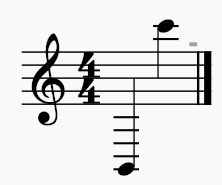

In [21]:
#  "allowTreble8vb" if set to True, gives the very useful "Treble8vb" clef:
n = note.Note('B3')
s = stream.Stream([n])
clef.bestClef(s, allowTreble8vb=True)

<music21.clef.Treble8vbClef>

## Ties

Ties connect **two pitches at the same pitch** level attached to different notes or chords.

In [22]:
# Let’s look at the top voice of an Agnus Dei by Palestrina:
agnus = corpus.parse('palestrina/Agnus_01')
agnusSop = agnus.parts[0]
agnusSop.measures(1, 7).show('xml')

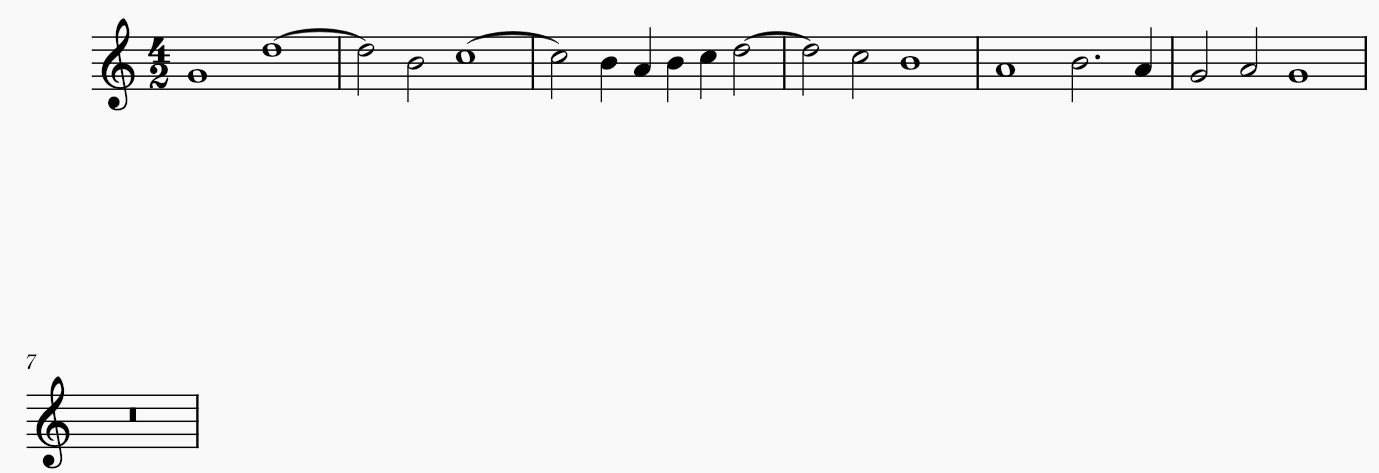

The second note of the first measure is tied, so let’s find it:

In [23]:
n1 = agnusSop.recurse().notes[1]
n1

<music21.note.Note D>

let’s look at the *.tie* attribute:

In [24]:
n1.tie

<music21.tie.Tie start>

In [25]:
n1.next('Note').tie

<music21.tie.Tie stop>

In [26]:
# The previous Note though, has a .tie of None
print(n1.previous('Note').tie)

None


We can find the value of ‘start’ or ‘stop’ in the *.type* attribute

In [27]:
n1.tie.type

'start'

In [28]:
n1.next('Note').tie.type

'stop'

There is a third tie type,‘continue’ if a the note is tied from before and tied to the next note.

In [29]:
c0 = note.Note('C4')
c0.tie = tie.Tie('start')
c1 = note.Note('C4')
c1.tie = tie.Tie('continue')
c2 = note.Note('C4')
c2.tie = tie.Tie('stop')
s = stream.Measure()
s.append([c0, c1, c2])
s.show('xml')

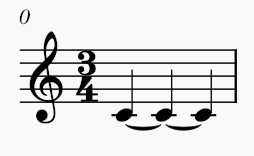

Ties also have a *.placement* attribute which can be ‘above’, ‘below’, or None

In [30]:
c0.tie.placement = 'above'
s.show('xml')

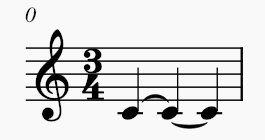

Ties also have a style attribute that represents how the tie should be displayed.

In [31]:
# It can be one of ‘normal’, ‘dotted’, ‘dashed’, or ‘hidden’
s = stream.Stream()
for tie_style in ('normal', 'dotted', 'dashed', 'hidden'):
    nStart = note.Note('E4')
    tStart = tie.Tie('start')
    tStart.style = tie_style
    nStart.tie = tStart
    nStop = note.Note('E4')
    tStop = tie.Tie('stop')
    tStop.style = tie_style # optional
    nStop.tie = tStop
    s.append([nStart, nStop])
s.show('xml')

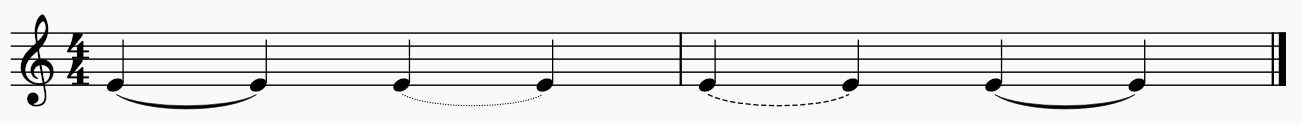|

## Ties and chords

Chords also have a *.tie* attribute:

In [32]:
ch0 = chord.Chord('C4 G4 B4')
ch0.tie = tie.Tie('start')
ch1 = chord.Chord('C4 G4 B4')
ch1.tie = tie.Tie('stop')
s = stream.Measure()
s.append([ch0, ch1])
s.show('xml')

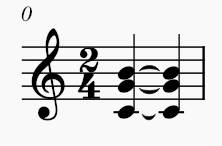

what if there are two chords where some notes should be tied and some should not be

In [33]:
ch2 = chord.Chord('D4 G4 A4')
ch3 = chord.Chord('D4 F#4 A4')
s = stream.Measure()
s.append([ch2, ch3])
s.show('xml')

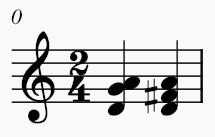

 looks for the *.tie* attribute on **Notes** or **Chords**, not Pitches

In [35]:
# Chords store not just pitch objects, but also Note objects
for n in ch2:
    print(n)

<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note A>


In [36]:
ch2[0]

<music21.note.Note D>

In [37]:
ch2[0].tie = tie.Tie('start')

In [38]:
# passing in the pitch name of the Note to the chord
ch2['A4']

<music21.note.Note A>

In [39]:
# We can also retrieve directly in the chord from the index
ch2['D4.tie']

<music21.tie.Tie start>

In [40]:
# or
ch2['0.tie']

<music21.tie.Tie start>

And we can set the information this way too

In [41]:
ch2['A4.tie'] = tie.Tie('start')

In [42]:
ch3['D4.tie'] = tie.Tie('start')
ch3['A4.tie'] = tie.Tie('start')

s.show('xml')

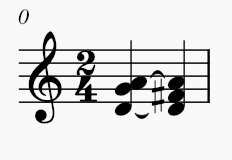

Here is an example of a case where we might want to set the *.placement* attribute of a tie manually

In [43]:
c1 = chord.Chord('C#4 E4 G4')
c2 = chord.Chord('C4 E4 G4')
c1[1].tie = tie.Tie('start')
c2[1].tie = tie.Tie('stop')
c1[2].tie = tie.Tie('start')
c2[2].tie = tie.Tie('stop')
s = stream.Stream()
s.append([c1, c2])
s.show('xml')

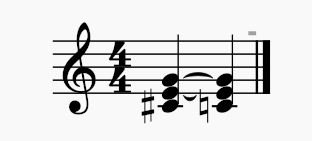

Hmm… the E tie intersects with the accidental and looks too confusing with a tie on the C# to C

In [44]:
c1[1].tie.placement = 'above'
s.show('xml')

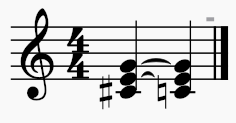

## Making and Stripping Ties from a Stream|

Sometimes ties get in the way of analysis.|

In [58]:
littlePiece = converter.parse('tinyNotation: 2/4 d4. e8~ e4 d4~ d8 f4.')
littlePiece.show('xml')

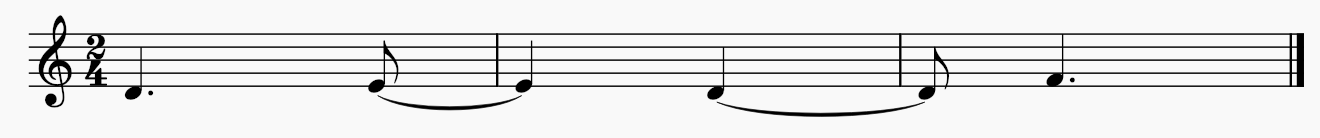

Suppose we wanted to know how many D’s are in this melody. This, unfortunately, isn’t the right approach:

In [46]:
numDs = 0
for n in littlePiece.recurse().notes:
    if n.pitch.name == 'D':
        numDs += 1
numDs

3

The first D is found properly, but the second D, being spanned across a barline, is counted twice. We need to fix it:

In [47]:
numDs = 0
for n in littlePiece.recurse().notes:
    if (n.pitch.name == 'D'
            and (n.tie is None
                 or n.tie.type == 'start')):
        numDs += 1
numDs

2

But this code will get very tedious if you also want to do something more complex, so it would be better if **the Stream had no tied notes in it**.

To take a Stream with tied notes and change it into a Stream with tied notes **represented by a single note**, call ***stripTies()*** on the Stream

In [48]:
c = chord.Chord('C#4 E4 G4')
c.tie = tie.Tie('start')
c2 = chord.Chord('C#4 E4 G4')
c2.tie = tie.Tie('stop')
s = stream.Measure()
s.append([c, c2])
s.show('xml')

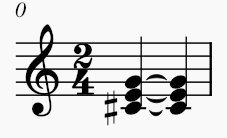

In [49]:
s2 = s.stripTies()
s2.show('xml')

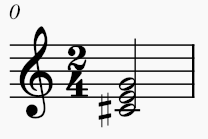

So, getting back to our little piece

In [59]:
# let’s get a score where the ties are stripped, but we’ll retain the measures
littleStripped = littlePiece.stripTies()

Now we’ll count the D’s again:

In [60]:
numDs = 0
for n in littleStripped.recurse().notes:
    if n.pitch.name == 'D':
        numDs += 1
numDs

2

Let’s look at *littleStripped* in a bit more detail

In [61]:
# showing it as a text output with end times of each object added
littleStripped.show('text', addEndTimes=True)

{0.0 - 3.0} <music21.stream.Measure 1 offset=0.0>
    {0.0 - 0.0} <music21.clef.TrebleClef>
    {0.0 - 0.0} <music21.meter.TimeSignature 2/4>
    {0.0 - 1.5} <music21.note.Note D>
    {1.5 - 3.0} <music21.note.Note E>
{2.0 - 4.5} <music21.stream.Measure 2 offset=2.0>
    {1.0 - 2.5} <music21.note.Note D>
{4.0 - 6.0} <music21.stream.Measure 3 offset=4.0>
    {0.5 - 2.0} <music21.note.Note F>
    {2.0 - 2.0} <music21.bar.Barline type=final>


One thing to notice is that the **note E** extends now beyond the end of the first 2/4 measure. 

The **second D**, in measure 2, by contrast, does not begin at the beginning of the measure, but instead halfway through the first measure.

This is why it’s sometimes most helpful to follow *stripTies()* with a *.flatten()*:

In [62]:
stripped2 = littlePiece.stripTies().flatten()
stripped2.show('text', addEndTimes=True)

{0.0 - 0.0} <music21.clef.TrebleClef>
{0.0 - 0.0} <music21.meter.TimeSignature 2/4>
{0.0 - 1.5} <music21.note.Note D>
{1.5 - 3.0} <music21.note.Note E>
{3.0 - 4.5} <music21.note.Note D>
{4.5 - 6.0} <music21.note.Note F>
{6.0 - 6.0} <music21.bar.Barline type=final>


In [63]:
littleStripped.show('xml')

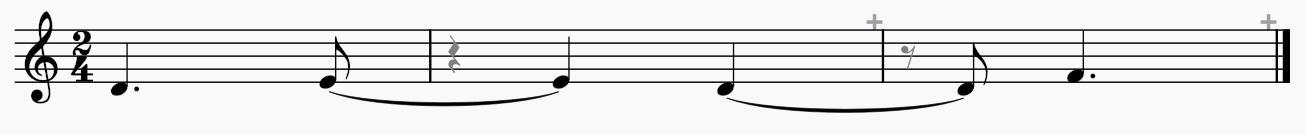

## Beams

Beams make it easier to read groups of eighth, sixteenth, and smaller notes by grouping them together.

In [64]:
m = stream.Measure()
c = note.Note('C4', type='quarter')
m.append(c)
d1 = note.Note('D4', type='eighth')
d2 = note.Note('D4', type='eighth')
m.append([d1, d2])
e = note.Note('E4', type='16th')
m.repeatAppend(e, 4)
m.show('text')

{0.0} <music21.note.Note C>
{1.0} <music21.note.Note D>
{1.5} <music21.note.Note D>
{2.0} <music21.note.Note E>
{2.25} <music21.note.Note E>
{2.5} <music21.note.Note E>
{2.75} <music21.note.Note E>


Every note and chord has a *.beams* attribute

In [65]:
c.beams

<music21.beam.Beams>

but d1 and d2 being eighth notes, should probably be beamed.

So we will create a *Beam* object for **d1** 

In [66]:
beam1 = beam.Beam(type='start', number=1)

In [67]:
d1Beams = d1.beams
d1Beams.append(beam1)
d1.beams

<music21.beam.Beams <music21.beam.Beam 1/start>>

In [68]:
d1Beams

<music21.beam.Beams <music21.beam.Beam 1/start>>

But this way is tedious, let's do it easier

In [69]:
d2.beams.append('stop')
d2.beams

<music21.beam.Beams <music21.beam.Beam 1/stop>>

Now when we show the score we’ll see it with some beams:

In [70]:
m.show('xml')

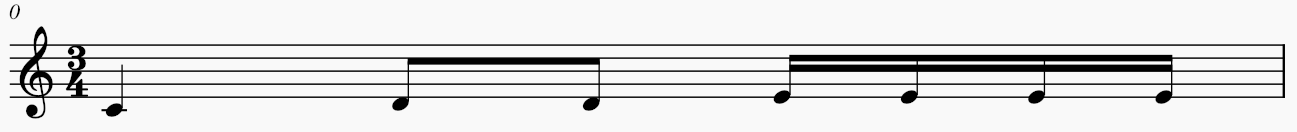

here’s an even easier way to **add multiple beams** by *.beams.fill()*

In [71]:
m.notes[3].beams.fill(2, 'start')
m.notes[4].beams.fill(2, 'continue')
m.notes[5].beams.fill(2, 'continue')
m.notes[6].beams.fill(2, 'stop')
m.show('xml')

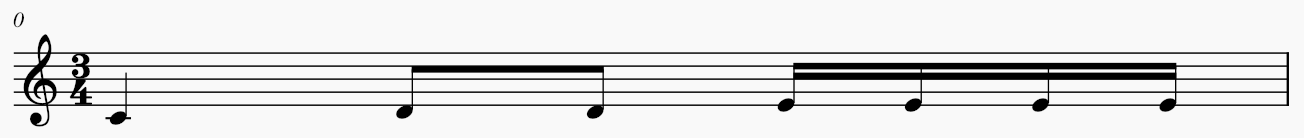

There are cases, such as dotted eighths followed by sixteenths, where **partial beams** are needed:

In [76]:
m2 = stream.Measure()
m2.append(meter.TimeSignature('6/8'))
c4 = note.Note('C4')
d8 = note.Note('D4', type='eighth')
e8 = note.Note('E4', type='eighth')
e8.beams.append('start')
f16 = note.Note('F4', type='16th')
f16.beams.append('continue')
m2.append([c4, d8, e8, f16])

In [77]:
m2.show('xml')

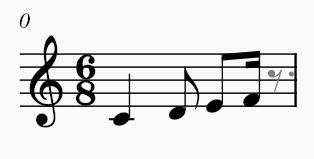

Now comes the second, partial beam, which we’ll make go right:

In [78]:
f16.beams.append('partial', 'right')
g8 = note.Note('G4', type='eighth')
g8.beams.append('continue')
a16 = note.Note('A4', type='16th')
a16.beams.append('stop')
a16.beams.append('partial', 'left')
m2.append([ g8, a16])
m2.show('xml')

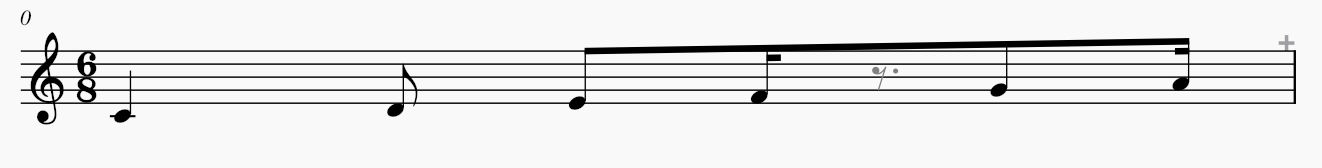

## Beams the easy way

Sometimes you don't need to worry about  beams, music21 will help you to handle it automatically.

In [2]:
m = stream.Measure()
ts34 = meter.TimeSignature('3/4')
m.append(ts34)
c = note.Note('C4', type='quarter')
m.append(c)
d1 = note.Note('D4', type='eighth')
d2 = note.Note('D4', type='eighth')
m.append([d1, d2])
e = note.Note('E4', type='16th')
m.repeatAppend(e, 4)
m.show('xml')

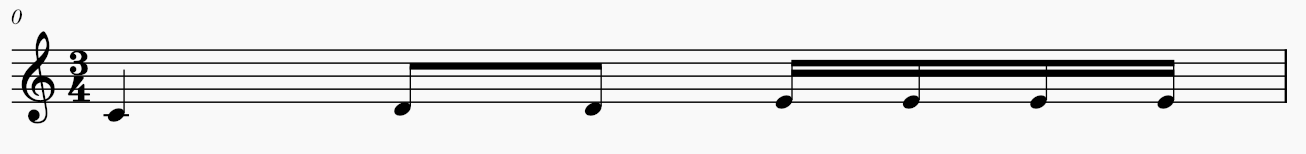

If the TimeSignature changes, *music21* will rebeam it differently:

In [3]:
ts68 = meter.TimeSignature('6/8')
m.replace(ts34, ts68)
m.show('xml')

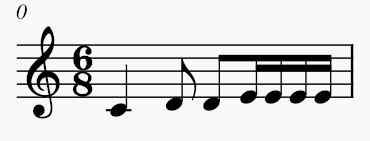